## Own resize multilinear

A function that implements linear interpolation for N Dimensions.

In [1]:
import tensorflow as tf

In [2]:
def get_string_binary(number, lenght):
    number_bin = format(number, "b")
    string_binary = '0'*lenght
    string_binary = position_to_read[:lenght-len(number_bin)] + number_bin
    return string_binary

In [ ]:
def get_multilinear_value(channel, position):
    """
    Calculates the interpolated value for a given position in the channel content.
    args:
        channel: A N-D Tensor [D0, D1, ..., DN-1]
        position: A 1-D float32 Tensor of N elements. Contents the position in the channel. 
    """
    N = position.size[0]
    # Dictionary with the values around the target position and the fraction
    # of the position
    surrounds = {}
    
    # for each dimension
    for d in N:
        integer_part = int(position[d])
        fraction_part = position[d] - integer_part
        integer_part_plus_one = min(integer_part + 1, channel.shape[d] - 1)
        
        surrounds[d] = {'0': integer_part,
                        '1': integer_part_plus_one,
                        'T': fraction_part}

    # values at the positions around the target in order as in a binary
    # increasing number
    values = []
    for i in range(2**N):
        position_to_read = get_string_binary(i, N)
        # coordinate
        coordinate = []
        # l_r left or right, ic can be '0' or '1'
        for d, l_r in enumerate(reversed(range(len(position_to_read)))):
            coordinate.append(surrounds.get(d).get(l_r))
        values.append(channel[coordinate])
        
    # With the values at the surrounding and the fractions,
    # the multilinear interpolation can take place
    value = 0
    
    for i in range(2**N):
        temp = 1.0
        position_to_read = get_string_binary(i, N)
        for d, l_r in enumerate(reversed(range(len(position_to_read)))):
            if l_r == '0':
                temp = temp * (1.0 - surrounds.get(d).get('T'))
            else:
                temp = temp * surrounds.get(d).get('T')
        temp = temp * values(i)
        value = value + temp
    return value

In [ ]:
def resize_multilinear(content, size):
    """
    Resizes content in N dimensions to size using multiliniear interpolation.
    args:
        images: An (N + 2)-D Tensor [batch, D0, D1, ..., DN-1, channels]
        size: A 1-D int32 Tensor of N elements: new_0D, new_1D,..new_N-1D 
    """
    
    def get_multilinear_pixel(channel, position):
        """
        Calculates the interpolated value for a given position in the channel content.
        args:
            channel: A N-D Tensor [D0, D1, ..., DN-1]
            position: A 1-D float32 Tensor of N elements. Contents the position in the channel. 
        """
        
    for d in N:
        # for each dimension
        for c in range(enlargedImg.shape[1]):
            

In [ ]:
def get_multilinear_value(channel, position):
    """
    Calculates the interpolated value for a given position in the channel content.
    args:
        channel: A N-D Tensor [D0, D1, ..., DN-1]
        position: A 1-D float32 Tensor of N elements. Contents the position in the channel. 
    """
    N = position.size[0]
    # Dictionary with the values around the target position and the fraction
    # of the position
    surrounds = {}
    
    # for each dimension
    for d in N:
        integer_part = int(position[d])
        fraction_part = position[d] - integer_part
        integer_part_plus_one = min(integer_part + 1, channel.shape[d] - 1)
        
        surrounds[d] = {'0': integer_part,
                        '1': integer_part_plus_one,
                        'T': fraction_part}

    # values at the positions around the target in order as in a binary
    # increasing number
    for i in range(2**N):
        

In [ ]:
def GetBilinearPixel(imArr, posX, posY):
	out = []
 
	#Get integer and fractional parts of numbers
	modXi = int(posX)
	modYi = int(posY)
	modXf = posX - modXi
	modYf = posY - modYi
	modXiPlusOneLim = min(modXi+1,imArr.shape[1]-1)
	modYiPlusOneLim = min(modYi+1,imArr.shape[0]-1)
 
	#Get pixels in four corners
	for chan in range(imArr.shape[2]):
		bl = imArr[modYi, modXi, chan]
		br = imArr[modYi, modXiPlusOneLim, chan]
		tl = imArr[modYiPlusOneLim, modXi, chan]
		tr = imArr[modYiPlusOneLim, modXiPlusOneLim, chan]
 
		#Calculate interpolation
		b = modXf * br + (1. - modXf) * bl
		t = modXf * tr + (1. - modXf) * tl
		pxf = modYf * t + (1. - modYf) * b
		out.append(int(pxf+0.5))
 
	return out
 
if __name__=="__main__":
 
	im = imread("test.jpg", mode="RGB")
	enlargedShape = list(map(int, [im.shape[0]*1.6, im.shape[1]*1.6, im.shape[2]]))
	enlargedImg = np.empty(enlargedShape, dtype=np.uint8)
	rowScale = float(im.shape[0]) / float(enlargedImg.shape[0])
	colScale = float(im.shape[1]) / float(enlargedImg.shape[1])
 
	for r in range(enlargedImg.shape[0]):
		for c in range(enlargedImg.shape[1]):
			orir = r * rowScale #Find position in original image
			oric = c * colScale
			enlargedImg[r, c] = GetBilinearPixel(im, oric, orir)
 
	imshow(enlargedImg)

In [1]:
import tensorflow as tf
import numpy as np
np.set_printoptions(precision=3)
import sys, os
import matplotlib.pyplot as plt
%matplotlib inline

wk_dir = os.path.abspath(os.path.dirname('__file__'))

In [2]:
# an image 2x2 with one channel
resize_shape = (10, 10)

a = np.ones((1, 2, 2, 1), dtype=np.float32)
a[0, 0, 0, 0] = 5.0
a[0, 1, 1, 0] = 5.0

b = tf.constant(a, dtype=tf.float32)
c = tf.image.resize_bilinear(b, resize_shape)

with tf.Session() as sess:
    np_c = sess.run(c)
    print(np_c[0, :, :, 0])
    print(type(np_c))

[[5.   4.2  3.4  2.6  1.8  1.   1.   1.   1.   1.  ]
 [4.2  3.72 3.24 2.76 2.28 1.8  1.8  1.8  1.8  1.8 ]
 [3.4  3.24 3.08 2.92 2.76 2.6  2.6  2.6  2.6  2.6 ]
 [2.6  2.76 2.92 3.08 3.24 3.4  3.4  3.4  3.4  3.4 ]
 [1.8  2.28 2.76 3.24 3.72 4.2  4.2  4.2  4.2  4.2 ]
 [1.   1.8  2.6  3.4  4.2  5.   5.   5.   5.   5.  ]
 [1.   1.8  2.6  3.4  4.2  5.   5.   5.   5.   5.  ]
 [1.   1.8  2.6  3.4  4.2  5.   5.   5.   5.   5.  ]
 [1.   1.8  2.6  3.4  4.2  5.   5.   5.   5.   5.  ]
 [1.   1.8  2.6  3.4  4.2  5.   5.   5.   5.   5.  ]]
<class 'numpy.ndarray'>


In [3]:
# read an image and resize it
file_name = 'images/android.png'
file_path = os.path.join(wk_dir, file_name)

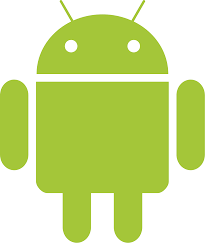

In [4]:
from IPython.display import Image
Image(file_name)

In [5]:
resize_shape = (100, 100)


image_content = tf.read_file(file_path)
image_decoded = tf.image.decode_png(image_content, channels=0)
images = tf.expand_dims(image_decoded, 0)
images_resized = tf.image.resize_bilinear(images, resize_shape)
images_resized_int = tf.cast(images_resized, tf.int32)
with tf.Session() as sess:
    np_c = sess.run(images_resized_int)
    print(np_c[0, :, :, 0])

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


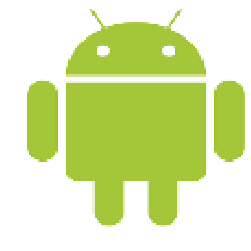

In [6]:
fig, ax = plt.subplots()
ax.imshow(np_c[0, :, :, :])
ax.axis('off')  # clear x-axis and y-axis
plt.show()